In [112]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [113]:
# Import Production Data (and State Index)
# Production Data Source:
# https://www.kaggle.com/datasets/kevinmorgado/us-energy-generation-2001-2022?select=organised_Gen.csv

# Load the State Index CSV file
state_df = pd.read_csv("Resources/states.csv", usecols = ['State', 'Code'])

# Load the Production CSV file and exclude first column
col_list = ['YEAR', 'MONTH', 'STATE', 'TYPE OF PRODUCER', 'ENERGY SOURCE', 'GENERATION (Megawatthours)']
prod_df = pd.read_csv("Resources/organised_Gen.csv", usecols = col_list)

# Assign title case to column names and rename 'State'
col_list_cased = [col.title() for col in col_list]
prod_df.columns = col_list_cased

# Filter for years 2002 - 2021 to match investment data set, filter out unused states and 'Total' rows
prod_df = prod_df.loc[(prod_df['Year'] > 2001) & (prod_df['Year'] < 2022) & (prod_df['State'] != 'US-TOTAL') & (prod_df['Type Of Producer'] == 'Total Electric Power Industry')]

# Filter for common energy types across both data sets
prod_source_list = ['Geothermal', 'Hydroelectric Conventional', 'Other Biomass', 'Solar Thermal and Photovoltaic', 'Wind']
prod_df = prod_df.loc[prod_df['Energy Source'].isin(prod_source_list)]

# Rename energy sources to common convention
prod_df = prod_df.replace(['Hydroelectric Conventional', 'Other Biomass', 'Solar Thermal and Photovoltaic'], 
                          ['Hydroelectric', 'Biomass', 'Solar'])

# Display sample data
prod_df.head()

,Year,Month,State,Type Of Producer,Energy Source,Generation (Megawatthours)
20215,2002,1,AK,Total Electric Power Industry,Hydroelectric,118944.0
20217,2002,1,AK,Total Electric Power Industry,Biomass,999.0
20242,2002,1,AL,Total Electric Power Industry,Hydroelectric,947959.0
20244,2002,1,AL,Total Electric Power Industry,Biomass,1622.0
20273,2002,1,AR,Total Electric Power Industry,Hydroelectric,230870.0


In [114]:
# Import Investment Data
# Investment Data Source:
# https://www.wctsservices.usda.gov/Energy/Downloads

# Load the Investment Excel file, "Detailed" Sheet
inv_df = pd.read_excel("Resources/EnergyInvestments_DataDownloads.xlsx", sheet_name = "Detailed")

# Unused state list
state_ex = ['American Samoa', 'Commonwealth of the Northern Mariana Islands', 'Federated States of Micronesia', 'Guam', 'Marshall Islands', 'Puerto Rico', 
            'United States Virgin Islands']

# Filter for years 2002 - 2021 to match investment data set, filter out unused states and 'Total' rows
inv_df = inv_df.loc[~inv_df['State'].isin(state_ex)]

# Filter for common energy types across both data sets
inv_source_list = ['Geothermal', 'Hydroelectric', 'Renewable Biomass', 'Solar', 'Wind']
inv_df = inv_df.loc[inv_df['Energy Type'].isin(inv_source_list)]

# Rename energy sources to common convention
inv_df = inv_df.replace('Renewable Biomass', 'Biomass')

# Join with State Index data to get State Abbreviation column
inv_df = pd.merge(inv_df, state_df, on = "State")

# Rename columns
inv_df.rename(columns={"State": "State Name", "Code": "State", "Energy Type": "Energy Source", "Program_Name": "Program Name"}, inplace = True)

# Display sample data
inv_df.head()

,State Name,County,Congressional District,Zip Code,Energy Source,Agency,Year,Program Name,Total Number of Investments,Total Amount of Assistance,Description,State
0,Alabama,Baldwin,AL-01,36507,Biomass,FSA,2010,BCAP Matching Payments (NOFA),2,40736.0,NaN,AL
1,Alabama,Baldwin,AL-01,36551,Biomass,FSA,2010,BCAP Matching Payments (NOFA),1,16509.0,NaN,AL
2,Alabama,Baldwin,AL-01,36567,Biomass,FSA,2010,BCAP Matching Payments (NOFA),1,639.0,NaN,AL
3,Alabama,Baldwin,AL-01,36580,Biomass,FSA,2010,BCAP Matching Payments (NOFA),1,16334.0,NaN,AL
4,Alabama,Baldwin,AL-01,36580,Biomass,RBS,2021,Rural Energy for America Program (REAP),1,7000000.0,Landfill Gas,AL


In [ ]:
#### Exploratory Data Analysis (Production)

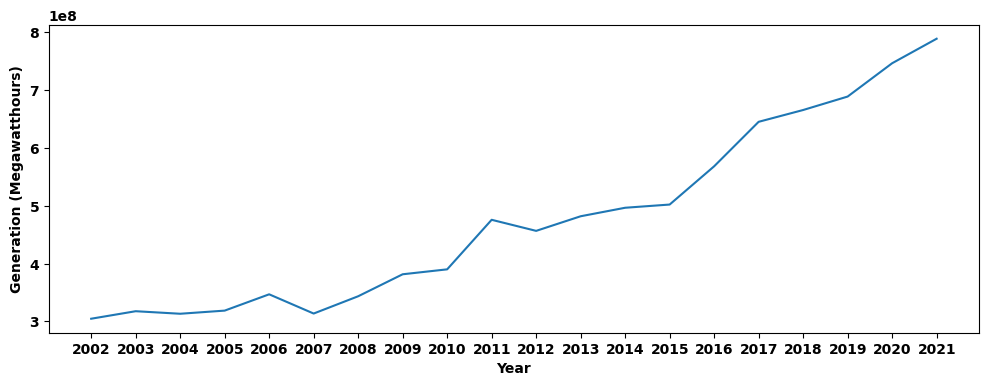

In [116]:
## Look at the trend of total production ('Generation (Megawatthours)') from 2002 - 2021 (all states combined)
# Groupby 'Year'
prod_df_year = prod_df.groupby(["Year"])

# x-axis
x_axis = prod_df_year['Year'].first()

# y-axis
y_axis = prod_df_year['Generation (Megawatthours)'].sum()

# Line plot
plt.figure(figsize = (12, 4))
plt.plot(x_axis, y_axis)
plt.xlabel("Year")
plt.xticks(np.arange(x_axis.min(), x_axis.max() + 1, 1.0))
plt.ylabel("Generation (Megawatthours)")
plt.show()

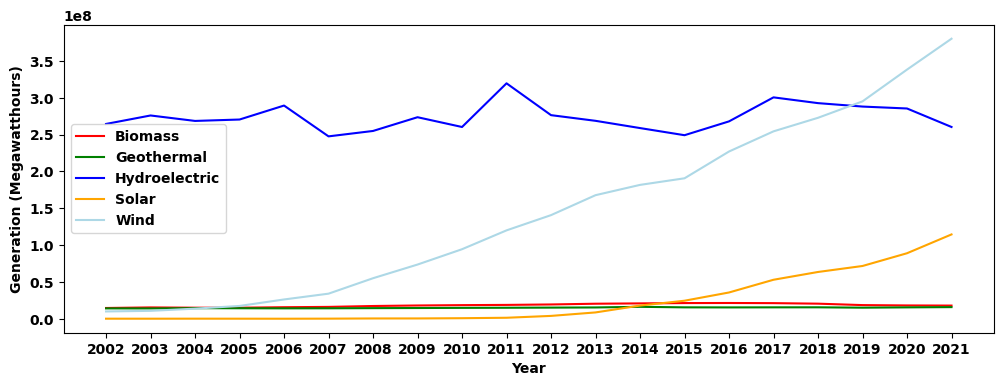

In [118]:
## Look at the trend of total production ('Generation (Megawatthours)') from 2002 - 2021 per Energy Source (all states combined)
# Energy Source List
source_list = ['Biomass', 'Geothermal', 'Hydroelectric', 'Solar', 'Wind']

# Color List
colors = ['red', 'green', 'blue', 'orange', 'lightblue']

# y-axis - Filter for 'Energy Source'
prod_df_bio = prod_df.loc[prod_df['Energy Source'] == source_list[0]].groupby(["Year"])['Generation (Megawatthours)'].sum()
prod_df_geo = prod_df.loc[prod_df['Energy Source'] == source_list[1]].groupby(["Year"])['Generation (Megawatthours)'].sum()
prod_df_hyd = prod_df.loc[prod_df['Energy Source'] == source_list[2]].groupby(["Year"])['Generation (Megawatthours)'].sum()
prod_df_sol = prod_df.loc[prod_df['Energy Source'] == source_list[3]].groupby(["Year"])['Generation (Megawatthours)'].sum()
prod_df_wnd = prod_df.loc[prod_df['Energy Source'] == source_list[4]].groupby(["Year"])['Generation (Megawatthours)'].sum()

# Line plot
plt.figure(figsize = (12, 4))
bio, = plt.plot(x_axis, prod_df_bio, color = colors[0], label = source_list[0])
geo, = plt.plot(x_axis, prod_df_geo, color = colors[1], label = source_list[1])
hyd, = plt.plot(x_axis, prod_df_hyd, color = colors[2], label = source_list[2])
sol, = plt.plot(x_axis, prod_df_sol, color = colors[3], label = source_list[3])
wnd, = plt.plot(x_axis, prod_df_wnd, color = colors[4], label = source_list[4])
plt.xlabel("Year")
plt.xticks(np.arange(x_axis.min(), x_axis.max() + 1, 1.0))
plt.ylabel("Generation (Megawatthours)")
plt.legend(handles = [bio, geo, hyd, sol, wnd], loc = "best")
plt.show()

In [119]:
## Look at the trend of total production ('Generation (Megawatthours)') from 2002 - 2021 per Energy Source (all states combined)

# Filter for 2002, 2021 and ENergy Source
prod_df_bio_02 = prod_df.loc[(prod_df['Energy Source'] == source_list[0]) & (prod_df['Year'] == 2002)].groupby(["Year"])['Generation (Megawatthours)'].sum()
prod_df_bio_21 = prod_df.loc[(prod_df['Energy Source'] == source_list[0]) & (prod_df['Year'] == 2021)].groupby(["Year"])['Generation (Megawatthours)'].sum()
prod_df_geo_02 = prod_df.loc[(prod_df['Energy Source'] == source_list[1]) & (prod_df['Year'] == 2002)].groupby(["Year"])['Generation (Megawatthours)'].sum()
prod_df_geo_21 = prod_df.loc[(prod_df['Energy Source'] == source_list[1]) & (prod_df['Year'] == 2021)].groupby(["Year"])['Generation (Megawatthours)'].sum()
prod_df_hyd_02 = prod_df.loc[(prod_df['Energy Source'] == source_list[2]) & (prod_df['Year'] == 2002)].groupby(["Year"])['Generation (Megawatthours)'].sum()
prod_df_hyd_21 = prod_df.loc[(prod_df['Energy Source'] == source_list[2]) & (prod_df['Year'] == 2021)].groupby(["Year"])['Generation (Megawatthours)'].sum()
prod_df_sol_02 = prod_df.loc[(prod_df['Energy Source'] == source_list[3]) & (prod_df['Year'] == 2002)].groupby(["Year"])['Generation (Megawatthours)'].sum()
prod_df_sol_21 = prod_df.loc[(prod_df['Energy Source'] == source_list[3]) & (prod_df['Year'] == 2021)].groupby(["Year"])['Generation (Megawatthours)'].sum()
prod_df_wnd_02 = prod_df.loc[(prod_df['Energy Source'] == source_list[4]) & (prod_df['Year'] == 2002)].groupby(["Year"])['Generation (Megawatthours)'].sum()
prod_df_wnd_21 = prod_df.loc[(prod_df['Energy Source'] == source_list[4]) & (prod_df['Year'] == 2021)].groupby(["Year"])['Generation (Megawatthours)'].sum()

# Build summary table showing descending movement per energy source
summary = pd.DataFrame({'Energy Source': source_list,
                       'Movement 2021 vs 2002':[(list(prod_df_bio_21)[0] / list(prod_df_bio_02)[0]) - 1,
                                                (list(prod_df_geo_21)[0] / list(prod_df_geo_02)[0]) - 1,
                                                (list(prod_df_hyd_21)[0] / list(prod_df_hyd_02)[0]) - 1,
                                                (list(prod_df_sol_21)[0] / list(prod_df_sol_02)[0]) - 1,
                                                (list(prod_df_wnd_21)[0] / list(prod_df_wnd_02)[0]) - 1]})
summary = summary.sort_values(by=['Movement 2021 vs 2002'], ascending = False)
summary['Movement 2021 vs 2002'] = summary['Movement 2021 vs 2002'].map("{:,.0%}".format)
summary

,Energy Source,Movement 2021 vs 2002
3,Solar,"20,569%"
4,Wind,"3,568%"
0,Biomass,22%
1,Geothermal,12%
2,Hydroelectric,-2%


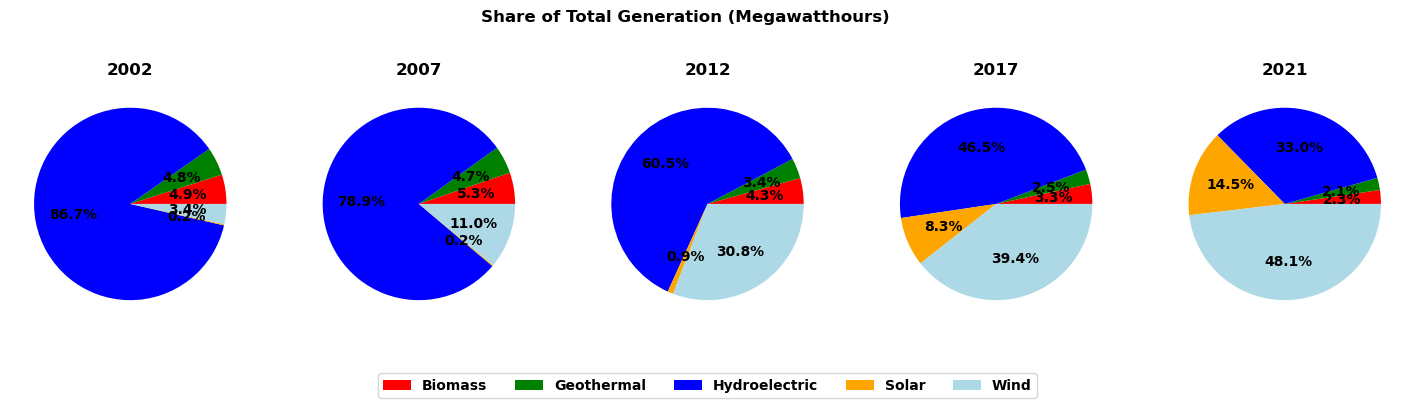

In [122]:
## Look at the trend of share total production ('Generation (Megawatthours)') every five years from 2002 - 2021 per Energy Source (all states combined)

# Filter for every five years - 2002, 2007, 2012, 2017, 2021
prod_df_02 = prod_df.loc[prod_df['Year'] == 2002].groupby(['Energy Source'])['Generation (Megawatthours)'].sum()
prod_df_07 = prod_df.loc[prod_df['Year'] == 2007].groupby(['Energy Source'])['Generation (Megawatthours)'].sum()
prod_df_12 = prod_df.loc[prod_df['Year'] == 2012].groupby(['Energy Source'])['Generation (Megawatthours)'].sum()
prod_df_17 = prod_df.loc[prod_df['Year'] == 2017].groupby(['Energy Source'])['Generation (Megawatthours)'].sum()
prod_df_21 = prod_df.loc[prod_df['Year'] == 2021].groupby(['Energy Source'])['Generation (Megawatthours)'].sum()

# y labels
label_source = prod_df.groupby(['Energy Source'])['Energy Source'].first()

# Build pie chart subplots
fig, axs = plt.subplots(1, 5, figsize=(18, 4), sharey=True)
axs[0].pie(list(prod_df_02), colors = colors, autopct="%1.1f%%")
axs[0].title.set_text('2002')
axs[1].pie(list(prod_df_07), colors = colors, autopct="%1.1f%%")
axs[1].title.set_text('2007')
axs[2].pie(list(prod_df_12), colors = colors, autopct="%1.1f%%")
axs[2].title.set_text('2012')
axs[3].pie(list(prod_df_17), colors = colors, autopct="%1.1f%%")
axs[3].title.set_text('2017')
axs[4].pie(list(prod_df_21), colors = colors, autopct="%1.1f%%")
axs[4].title.set_text('2021')
fig.suptitle('Share of Total Generation (Megawatthours)')
fig.legend(list(label_source), loc='lower center', ncol=len(list(label_source)), bbox_transform=fig.transFigure)

In [121]:
## Look at share of total production ('Generation (Megawatthours)') per Energy Source per State in 2021

# Filter by 2021 and group by State for ALL Energy Sources combined
prod_df_state = prod_df.loc[prod_df['Year'] == 2021].groupby(['State'])['Generation (Megawatthours)'].sum()

# Filter by 2021 and group by State for each Energy Source
prod_df_bio_21 = prod_df.loc[(prod_df['Energy Source'] == source_list[0]) & (prod_df['Year'] == 2021)].groupby(["State"])['Generation (Megawatthours)'].sum()
prod_df_geo_21 = prod_df.loc[(prod_df['Energy Source'] == source_list[1]) & (prod_df['Year'] == 2021)].groupby(["State"])['Generation (Megawatthours)'].sum()
prod_df_hyd_21 = prod_df.loc[(prod_df['Energy Source'] == source_list[2]) & (prod_df['Year'] == 2021)].groupby(["State"])['Generation (Megawatthours)'].sum()
prod_df_sol_21 = prod_df.loc[(prod_df['Energy Source'] == source_list[3]) & (prod_df['Year'] == 2021)].groupby(["State"])['Generation (Megawatthours)'].sum()
prod_df_wnd_21 = prod_df.loc[(prod_df['Energy Source'] == source_list[4]) & (prod_df['Year'] == 2021)].groupby(["State"])['Generation (Megawatthours)'].sum()

# Merge datasets to show evergy sources side-by-side
state_pct = pd.merge(prod_df_state, prod_df_bio_21, how = 'left', on = "State")
state_pct.rename(columns={"Generation (Megawatthours)_x": "Total", "Generation (Megawatthours)_y": source_list[0]}, inplace = True)
state_pct = pd.merge(state_pct, prod_df_geo_21, how = 'left', on = "State")
state_pct.rename(columns={"Generation (Megawatthours)": source_list[1]}, inplace = True)
state_pct = pd.merge(state_pct, prod_df_hyd_21, how = 'left', on = "State")
state_pct.rename(columns={"Generation (Megawatthours)": source_list[2]}, inplace = True)
state_pct = pd.merge(state_pct, prod_df_sol_21, how = 'left', on = "State")
state_pct.rename(columns={"Generation (Megawatthours)": source_list[3]}, inplace = True)
state_pct = pd.merge(state_pct, prod_df_wnd_21, how = 'left', on = "State")
state_pct.rename(columns={"Generation (Megawatthours)": source_list[4]}, inplace = True)
state_pct = state_pct.fillna(0)

# Create new columns for % share of total production
state_pct['Biomass %'] = (state_pct[source_list[0]] / state_pct['Total'])
state_pct['Geothermal %'] = (state_pct[source_list[1]] / state_pct['Total'])
state_pct['Hydroelectric %'] = (state_pct[source_list[2]] / state_pct['Total'])
state_pct['Solar %'] = (state_pct[source_list[3]] / state_pct['Total'])
state_pct['Wind %'] = (state_pct[source_list[4]] / state_pct['Total'])
state_pct = state_pct.iloc[:, 6:11]
state_pct

,Biomass %,Geothermal %,Hydroelectric %,Solar %,Wind %
State,,,,,
AK,0.021093,0.000000,0.908719,0.000000,0.070188
AL,0.002903,0.000000,0.959141,0.037957,0.000000
AR,0.019072,0.000000,0.886010,0.094918,0.000000
AZ,0.001543,0.000000,0.411838,0.473327,0.113292
CA,0.032963,0.145859,0.185523,0.436547,0.199108
CO,0.004324,0.000000,0.089103,0.094817,0.811755
CT,0.431041,0.000000,0.294164,0.263201,0.011594
DC,0.681995,0.000000,0.000000,0.318005,0.000000
DE,0.517045,0.000000,0.000000,0.447665,0.035291


In [111]:
## Look at Top 5 states per Energy Source in 2021

# Sort state_pct table by each Energy Source (descending)
bio_pct = state_pct.sort_values(by=['Biomass %'], ascending = False)
bio = list(bio_pct.iloc[0:5, 0].index)
geo_pct = state_pct.sort_values(by=['Geothermal %'], ascending = False)
geo = list(geo_pct.iloc[0:5, 1].index)
hyd_pct = state_pct.sort_values(by=['Hydroelectric %'], ascending = False)
hyd = list(hyd_pct.iloc[0:5, 2].index)
sol_pct = state_pct.sort_values(by=['Solar %'], ascending = False)
sol = list(sol_pct.iloc[0:5, 3].index)
wnd_pct = state_pct.sort_values(by=['Wind %'], ascending = False)
wnd = list(wnd_pct.iloc[0:5, 4].index)

# Create summary dataframe to show the top 5 states for each Energy Source
summary = pd.DataFrame({'Rank': np.arange(1, 6, 1),
                        'Biomass %': bio,
                        'Geothermal %': geo,
                        'Hydroelectric %': hyd,
                        'Solar %': sol,
                        'Wind %': wnd})
summary


,Rank,Biomass %,Geothermal %,Hydroelectric %,Solar %,Wind %
0,1,DC,NV,KY,MS,KS
1,2,DE,CA,TN,FL,IA
2,3,CT,HI,AL,NJ,IL
3,4,NJ,UT,AK,UT,OK
4,5,RI,ID,AR,VA,WY
